In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### *(Opise koda/naredbi pisao sam iznad/prije izvođenja tih naredbi)*

## Podaci iz `regular_season_results.csv` datoteke

In [3]:
X = pd.read_csv('regular_season_results.csv')

### Prikaz osnovnih podataka datoteke poput:
1. stupaca, tj. oznaka podataka u datoteci,
2. nekoliko prvih podataka,
3. opis podataka, poput ukupnog broja, maksimuma, minimuma, percentila...

In [4]:
X.columns.values

array(['season', 'daynum', 'wteam', 'wscore', 'lteam', 'lscore', 'wloc',
       'numot'], dtype=object)

In [5]:
X.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


In [6]:
X.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


### ------------------------------------------------------------------------------------------------------------------------------------
U prikazu ispod nalazi se prikaz lokacije na kojoj je igrao eventualni pobjednik utakmice u obliku pie grafa.

Moguće vrijednosti su:
 - H - doma
 - A - u gostima
 - N - neutralni "teren"
<br>
<br>
Vidljivo je da daleko prevladavajući domaći teren

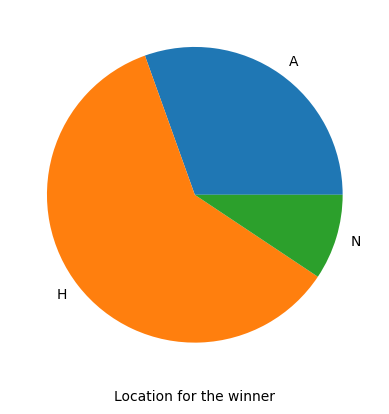

In [7]:
count_per_loc = X.groupby('wloc').count().loc[:,'wteam'].values
label_name= X.groupby('wloc').count().index.values
plt.pie(count_per_loc, labels = label_name)
plt.xlabel('Location for the winner')
plt.show()

<br>
Graf ispod prikazuje broj utakmica ovisno koji je dio sezone.
<br>
Frekvencija prikazanih podataka je otprilike jedan "stupac" po tjednu.

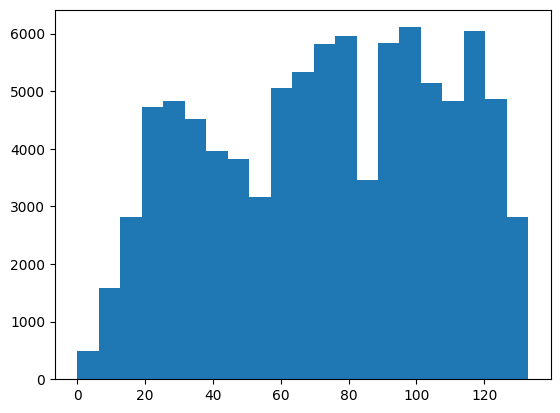

In [71]:
plt.hist(X.daynum, bins = 21)
plt.show()

#### Nepostojeće vrijednosti:
Prikaz broja podataka u kojima nedostaju podaci o broju produžetaka odigranih. <br>
(U ranijim sezonama nisu postojali produžeci)

In [70]:
X.numot.isna().sum()

39891

## Podaci iz `tourney_results.csv` datoteke

In [9]:
Y = pd.read_csv('tourney_results.csv')

#### Opet opis osnovnih podataka:

In [10]:
Y.head()

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN


In [34]:
Y.nunique()

season     18
daynum     12
wteam     155
wscore     67
lteam     258
lscore     66
numot       3
freq       32
dtype: int64

<br>
Sljedeći graf prikazuje usporedbu poena pobjednika i poraženih u utakmici.<br>
Poraženi naravno nikada nemaju manje poena od pobjednika te zato postoji nevidljiva linija od (0,0) do (130, 130). <br>
Što je "točka" udaljenija od te linije to je pobjednik imao više poena od poraženih. <br>
Kako je minimalna vrijednost poena pobjednika veća od minimalnog broja poraženih, "nevidljiva" granica ne ide iz samog kuta grafa.

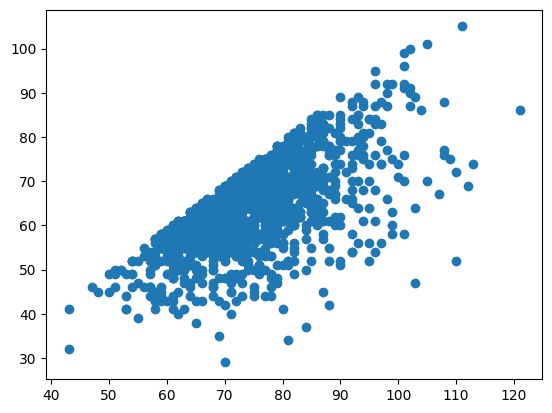

In [73]:
plt.scatter(Y.wscore, Y.lscore)
plt.show()

<br>
Usporedba gornjih podataka u histogramu:

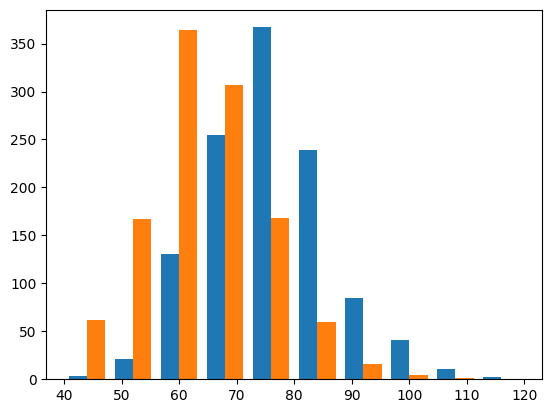

In [12]:
plt.hist(Y[['wscore', 'lscore']], bins = 10, range = (40, 120))
plt.show()

In [13]:
Y[['wscore', 'lscore']]

,wscore,lscore
0,86,80
1,68,59
2,75,63
3,75,60
4,81,74
...,...,...
1151,85,63
1152,79,59
1153,72,68
1154,61,56


#### Strešeći podaci:
Provjeravaju se i ispisuju vrijednosti koje iskaču od ostalih vrijednosti u grafu tj. prosjeka vrijednosti tog stupca

In [75]:
Y.loc[Y.wscore - Y.wscore.mean() > 30, ['wteam','wscore']]

,wteam,wscore
6,640,110
76,810,109
145,636,110
196,625,108
479,636,108
610,843,111
716,592,112
717,636,107
724,790,121
788,708,113


<br>
Scuffed ispis broja rezultata ovisno kojoj skupini pripada po zabijenim poenima.<br>
Vidljivo je da vrhunac grafa poena pobjednika u grupi 70-80, dok je taj isti kod gubitnika unutar područja 60-70.

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
wpts = Y.groupby(pd.cut(Y["wscore"], np.arange(40, 130+10, 10))).count()
wpts.wscore

wscore
(40, 50]        6
(50, 60]       78
(60, 70]      290
(70, 80]      440
(80, 90]      242
(90, 100]      72
(100, 110]     24
(110, 120]      3
(120, 130]      1
Name: wscore, dtype: int64

In [77]:
lpts = Y.groupby(pd.cut(Y["lscore"], np.arange(40, 130+10, 10))).count()
lpts.lscore

lscore
(40, 50]      104
(50, 60]      341
(60, 70]      414
(70, 80]      218
(80, 90]       58
(90, 100]      10
(100, 110]      2
(110, 120]      0
(120, 130]      0
Name: lscore, dtype: int64

In [17]:
warnings.filterwarnings('default')

<br>
Sljedeći graf je prikaz broja ukupnih pobjeda timova u svim turnirima zapisanima u datoteku u obliku grafa raspršenja.

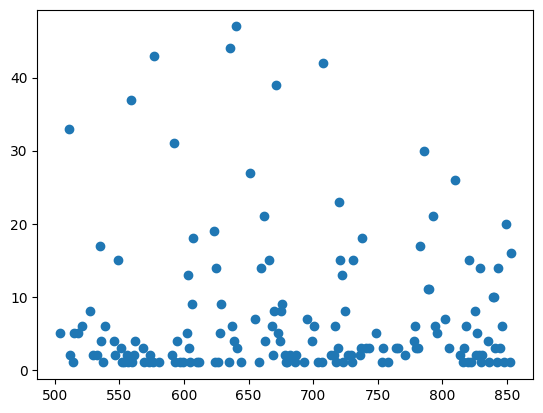

In [50]:
Y['freq'] = Y.groupby('wteam')['wteam'].transform('count')
plt.scatter(Y.drop_duplicates('wteam').sort_values(by=['wteam'])[['wteam']],Y.drop_duplicates('wteam').sort_values(by=['wteam'])[['freq']])
plt.show()


### Kako se ne bi prikazivali samo podaci iz dvije datoteke u nastavku su prikazani osnovni podaci iz nekoliko ostalih. Njihova je svrha povezivanje s dvije glavne datoteke kako one ne bi bile pretrpane podacima

## Podaci iz `seasons.csv` datoteke

In [62]:
Z = pd.read_csv('seasons.csv')
Z.head()

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South


## Podaci iz `tourney_slots.csv` datoteke

In [63]:
T = pd.read_csv('tourney_slots.csv')
T.head()

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12


In [65]:
T.describe()

,season,slot,strongseed,weakseed
count,1223,1223,1223,1223
unique,19,74,74,74
top,S,R1W1,W01,W16
freq,67,19,19,19
